In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import tkinter as tk
from draw_digit import DrawingApp
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

2024-06-07 23:47:24.815860: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-07 23:47:24.816082: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 23:47:24.818325: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 23:47:24.844648: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 23:47:25.319719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
(x_train, y_train), (x_test_raw, y_test) = mnist.load_data()

In [3]:
def plot_digit(image):
    image = np.clip(image, 0, 255).astype(np.uint8)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

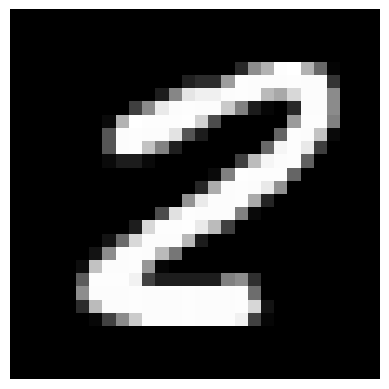

In [4]:
plot_digit(x_train[12551])

In [5]:
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))
x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))]) / 255

In [6]:
y_train = to_categorical(y_train, num_classes=10)

In [7]:
x_test = np.reshape(x_test_raw, (x_test_raw.shape[0], 28*28))
x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))]) / 255

In [8]:
input_size = 784
output_size = 10
weights = np.random.normal(0, 0.01, (input_size, output_size))
biases = np.zeros((1, output_size))
weights = np.vstack([weights, biases])

In [9]:
def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=1, keepdims=True)
    exp_scores = np.exp(Z_shifted)
    softmax_scores = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return softmax_scores

In [10]:
def xentropy(S, T):
    cross_entropy = -np.sum(T * np.log(S)) / T.shape[0]
    return cross_entropy

In [11]:
def grad_xentropy(X, S, T):
    return (X.T @ (S - T)) / T.shape[0]

In [42]:
def gradient_descent(W, X, T, steps, learning_rate, lam):
    n = T.shape[0]
    for i in range(steps):
        if i % 5000 == 1:
            print("Step: ", i, " Current cost: ", xentropy(S, T) + ((-0.00000498*i + lam)/(2 * n)) * np.sum(W**2))
            
        S = softmax(X @ W)
        gradient = grad_xentropy(X, S, T) + ((-0.00000498*i + lam) * W) / n
        W = W - (-0.000095*i + learning_rate) * gradient
    
    return W

In [43]:
def calculate_accuracy(W, X, labels):
    correct = 0
    stats = [[0, 0] for _ in range(10)]
    S = softmax(X @ W)
    predicted_labels = np.argmax(S, axis=1)
    for i in range(len(labels)):
        if predicted_labels[i] == labels[i]:
            correct += 1
            stats[labels[i]][0] += 1
        
        stats[labels[i]][1] += 1
    
    classes = np.zeros((1, 10))
    for i in range(10):
        classes[0, i] = (stats[i][0] / stats[i][1])
    
    accuracy = 100 * correct / len(labels)
    return accuracy, classes, predicted_labels

In [44]:
trained_weights = gradient_descent(weights, x_train, y_train, 100000, 10.0, 0.5)

Step:  1  Current cost:  2.295871005285811
Step:  5001  Current cost:  0.7431943804626353
Step:  10001  Current cost:  0.5271163627054347
Step:  15001  Current cost:  0.5696895731385277
Step:  20001  Current cost:  0.48316810425130086
Step:  25001  Current cost:  1.6859968155518381
Step:  30001  Current cost:  0.40855258445537795
Step:  35001  Current cost:  0.3832624539390418
Step:  40001  Current cost:  0.35952838438038087
Step:  45001  Current cost:  2.4130210147611506
Step:  50001  Current cost:  0.31533635361204043
Step:  55001  Current cost:  4.02921394614176
Step:  60001  Current cost:  0.4455561224555698
Step:  65001  Current cost:  0.25508717063890385
Step:  70001  Current cost:  0.25166272508951987
Step:  75001  Current cost:  0.23500166916924892
Step:  80001  Current cost:  0.22506336006418243
Step:  85001  Current cost:  0.2217275011988743
Step:  90001  Current cost:  0.2199726775306912
Step:  95001  Current cost:  0.21851662866628685


In [45]:
overall_accuracy, classes_accuracy, predictions = calculate_accuracy(trained_weights, x_test, y_test)

In [46]:
print(overall_accuracy)

92.31


In [47]:
np.savetxt('92_31.txt', trained_weights)

In [48]:
def plot_probabilities(data, title):
    flattened_data = data.flatten()
    plt.bar(range(len(flattened_data)), flattened_data)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(title)
    plt.xticks(range(len(flattened_data)))
    plt.show()

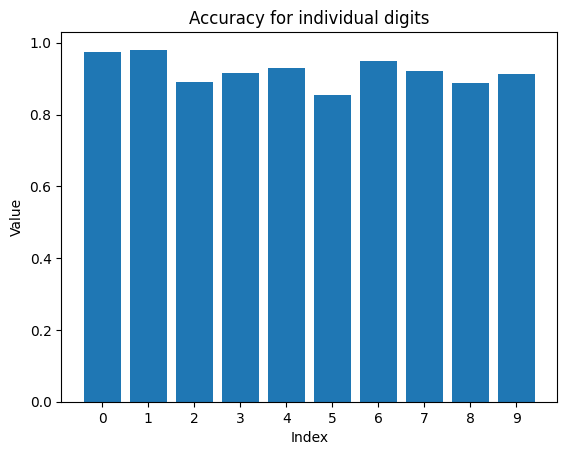

In [49]:
plot_probabilities(classes_accuracy, "Accuracy for individual digits")

In [50]:
def take_random_digit(pred, test, correct):
    random_index = random.randint(0, 9999)
    plot_digit(test[random_index])
    print("This digit is a ", correct[random_index])
    print("Classified as ", pred[random_index])

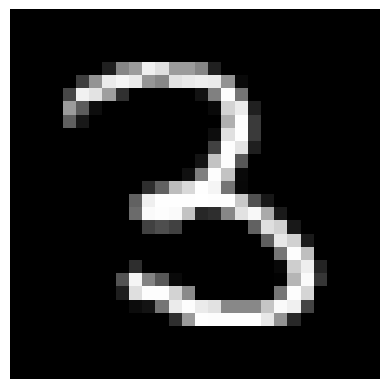

This digit is a  3
Classified as  3


In [96]:
take_random_digit(predictions, x_test_raw, y_test)

In [52]:
def classify_digit(W, X):
    S = softmax(X @ W)
    return S

# Funkcja do rysowania cyfr

In [53]:
def draw():
    root = tk.Tk()
    app = DrawingApp(root)
    root.mainloop()
    digit = app.get_array()
    plot_digit(digit)
    flattened = digit.flatten()
    result = np.append(flattened, 1).reshape(1, -1) / 255
    
    plot_probabilities(classify_digit(trained_weights, result), "Probabilities")

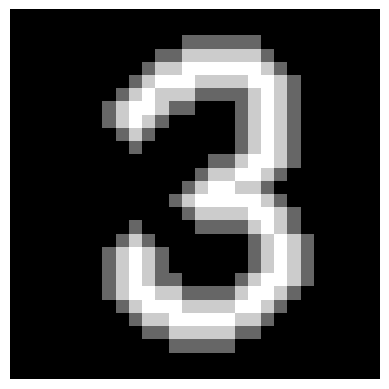

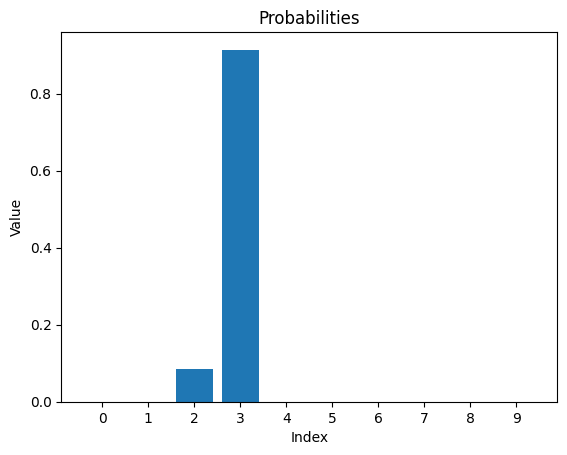

In [97]:
draw()